# Pandas Read excel data and sort and filter it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Path to your Excel file
file_path = '../_data/texts/animals.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

In [3]:
# Display the DataFrame
df

,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
0,Lion,Savannah,Carnivore,12,80,Vulnerable,150-250,"Hyenas, Large crocodiles"
1,Elephant,Forest,Herbivore,60,25,Endangered,"2,200-6,000","Humans, Lions"
2,Cheetah,Savannah,Carnivore,10,120,Vulnerable,40-65,"Lions, Hyenas"
3,Giraffe,Savannah,Herbivore,25,60,Least Concern,"800-1,200","Lions, Leopards"
4,Panda,Forest,Herbivore,20,20,Vulnerable,70-100,Humans
5,Kangaroo,Grassland,Herbivore,23,70,Least Concern,18-90,"Humans, Large birds of prey"
6,Penguin,Polar,Carnivore,20,2,Least Concern,2.2-45,"Seals, Sea lions"
7,Dolphin,Ocean,Carnivore,30,25,Least Concern,150-650,"Sharks, Humans"
8,Eagle,Mountains,Carnivore,20,160,Least Concern,0.9-6.3,"Hawks, Larger eagles"
9,Tiger,Forest,Carnivore,26,60,Endangered,90-310,"Humans, Crocodiles"


## Change last columns string value to list

In [4]:
# Function to process column 3 values: split by commas and newlines
def process_column_string_to_list(value):
    # Check if the value is a string, otherwise return an empty list
    if isinstance(value, str):
        # Split by comma and then by newline, flatten the list
        return [item.strip() for line in value.split('\n') for item in line.split(',')]
    else:
        return []

In [5]:
# Apply the processing function to last column
df.iloc[:, 7] = df.iloc[:, 7].apply(process_column_string_to_list)
# another method is
df['Diet'] = df['Diet'].apply(process_column_string_to_list)

In [6]:
df

,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
0,Lion,Savannah,[Carnivore],12,80,Vulnerable,150-250,"[Hyenas, Large crocodiles]"
1,Elephant,Forest,[Herbivore],60,25,Endangered,"2,200-6,000","[Humans, Lions]"
2,Cheetah,Savannah,[Carnivore],10,120,Vulnerable,40-65,"[Lions, Hyenas]"
3,Giraffe,Savannah,[Herbivore],25,60,Least Concern,"800-1,200","[Lions, Leopards]"
4,Panda,Forest,[Herbivore],20,20,Vulnerable,70-100,[Humans]
5,Kangaroo,Grassland,[Herbivore],23,70,Least Concern,18-90,"[Humans, Large birds of prey]"
6,Penguin,Polar,[Carnivore],20,2,Least Concern,2.2-45,"[Seals, Sea lions]"
7,Dolphin,Ocean,[Carnivore],30,25,Least Concern,150-650,"[Sharks, Humans]"
8,Eagle,Mountains,[Carnivore],20,160,Least Concern,0.9-6.3,"[Hawks, Larger eagles]"
9,Tiger,Forest,[Carnivore],26,60,Endangered,90-310,"[Humans, Crocodiles]"


## Column values

In [7]:
preds = df['Predators/Threats'].drop_duplicates()
preds

0       [Hyenas, Large crocodiles]
1                  [Humans, Lions]
2                  [Lions, Hyenas]
3                [Lions, Leopards]
4                         [Humans]
5    [Humans, Large birds of prey]
6               [Seals, Sea lions]
7                 [Sharks, Humans]
8           [Hawks, Larger eagles]
9             [Humans, Crocodiles]
Name: Predators/Threats, dtype: object

In [8]:
preds.explode().unique().tolist()

['Hyenas',
 'Large crocodiles',
 'Humans',
 'Lions',
 'Leopards',
 'Large birds of prey',
 'Seals',
 'Sea lions',
 'Sharks',
 'Hawks',
 'Larger eagles',
 'Crocodiles']

In [9]:
preds.explode().sort_values().unique().tolist()

['Crocodiles',
 'Hawks',
 'Humans',
 'Hyenas',
 'Large birds of prey',
 'Large crocodiles',
 'Larger eagles',
 'Leopards',
 'Lions',
 'Sea lions',
 'Seals',
 'Sharks']

In [10]:
sorted(set(sum(df['Predators/Threats'].tolist(), [])))

['Crocodiles',
 'Hawks',
 'Humans',
 'Hyenas',
 'Large birds of prey',
 'Large crocodiles',
 'Larger eagles',
 'Leopards',
 'Lions',
 'Sea lions',
 'Seals',
 'Sharks']

## Filter and sort

In [11]:
# Filter function to check if 'Lions' is in the list
def filter_lions(values):
    return 'Lions' in values
def filter_savannah(values):
    return 'Savannah' in values

# Applying filters
filtered_df = df[df['Predators/Threats'].apply(filter_lions) & df['Habitat'].apply(filter_savannah)]
filtered_df


,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
2,Cheetah,Savannah,[Carnivore],10,120,Vulnerable,40-65,"[Lions, Hyenas]"
3,Giraffe,Savannah,[Herbivore],25,60,Least Concern,"800-1,200","[Lions, Leopards]"


In [12]:
filtered_df = df[df['Predators/Threats'].apply(filter_lions)]
filtered_df

,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
1,Elephant,Forest,[Herbivore],60,25,Endangered,"2,200-6,000","[Humans, Lions]"
2,Cheetah,Savannah,[Carnivore],10,120,Vulnerable,40-65,"[Lions, Hyenas]"
3,Giraffe,Savannah,[Herbivore],25,60,Least Concern,"800-1,200","[Lions, Leopards]"


In [13]:
# Sort the DataFrame based on the length of the lists in Column 1
sorted_df = filtered_df.iloc[(filtered_df['Weight Range (kg)'].apply(len)).argsort()]
sorted_df

,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
2,Cheetah,Savannah,[Carnivore],10,120,Vulnerable,40-65,"[Lions, Hyenas]"
3,Giraffe,Savannah,[Herbivore],25,60,Least Concern,"800-1,200","[Lions, Leopards]"
1,Elephant,Forest,[Herbivore],60,25,Endangered,"2,200-6,000","[Humans, Lions]"


In [14]:
# Reversed order
sorted_df = filtered_df.iloc[(-filtered_df['Weight Range (kg)'].apply(len)).argsort()]
sorted_df

,Animal,Habitat,Diet,Lifespan (Years),Speed (km/h),Conservation Status,Weight Range (kg),Predators/Threats
1,Elephant,Forest,[Herbivore],60,25,Endangered,"2,200-6,000","[Humans, Lions]"
3,Giraffe,Savannah,[Herbivore],25,60,Least Concern,"800-1,200","[Lions, Leopards]"
2,Cheetah,Savannah,[Carnivore],10,120,Vulnerable,40-65,"[Lions, Hyenas]"


## Visualize

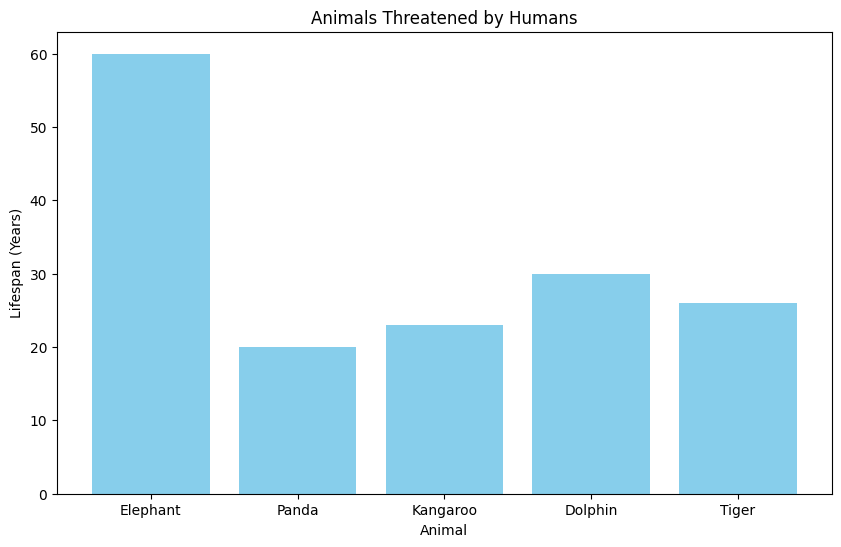

In [15]:
# Filter rows where "Humans" are in the "Predators/Threats" list
df_filtered = df[df['Predators/Threats'].apply(lambda x: 'Humans' in x)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['Animal'], df_filtered['Lifespan (Years)'], color='skyblue')
plt.xlabel('Animal')
plt.ylabel('Lifespan (Years)')
plt.title('Animals Threatened by Humans')
plt.show()